### Линейная полиномиальная регрессия (множественная) [Домашнее задание]

**Примечание:**

> Пожалуйста, не удаляйте комментарии или строки кода.

1. Пожалуйста, реализуйте функцию ```load_data(filename=None)```, которая будет загружать данные файла csv из ```filename``` и возвращать ```DataFrame```.

In [1]:
import pandas as pd

def load_data(filename=None):
    #Начало вашего кода
    df = pd.read_csv(filename)
    df = df.drop("Id", axis=1)
    return df
    #Конец вашего кода

num_data = load_data(filename="num_house_prices.csv")
num_data

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,60,7917,6,5,1999,2000,0.0,0,0,953,...,0,40,0,0,0,0,0,8,2007,175000
1334,20,13175,6,6,1978,1988,119.0,790,163,589,...,349,0,0,0,0,0,0,2,2010,210000
1335,70,9042,7,9,1941,2006,0.0,275,0,877,...,0,60,0,0,0,0,2500,5,2010,266500
1336,20,9717,5,6,1950,1996,0.0,49,1029,0,...,366,0,112,0,0,0,0,4,2010,142125


### Ожидаемые результаты:

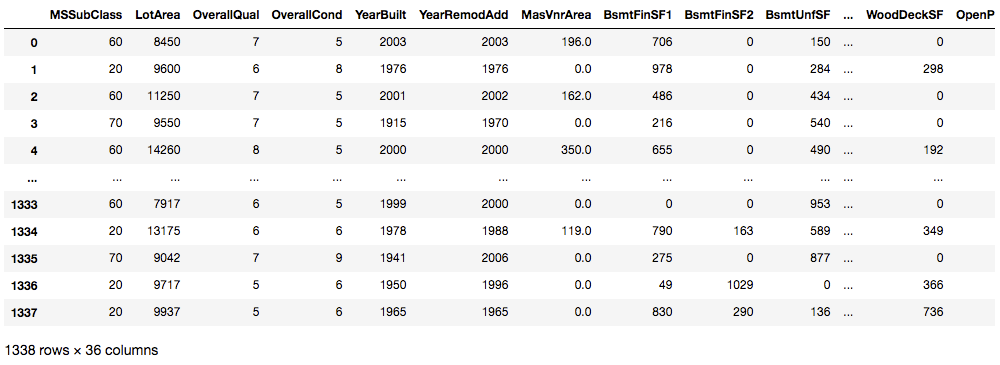

2. Пожалуйста, реализуйте функцию ```split_data(data, ratio=0.1)```, которая разбивает набор данных, загруженный в предыдущем вопросе, на наборы данных ```train``` и ```validation``` в соотношении 9:1.

In [2]:
import numpy as np

def split_data(data, ratio=0.1):
    np.random.seed(1)
    #Начало вашего кода    
    indices = np.arange(0, data.index.size)
    
    np.random.shuffle(indices)
    
    val_indices = indices[:round(ratio * data.index.size)]
    train_indices = indices[round(ratio * data.index.size):]
    
    val_data = data.iloc[val_indices]
    train_data = data.iloc[train_indices]
    #Конец вашего кода
    return {"validation":val_data, "train":train_data}

splitted_data = split_data(num_data, ratio=0.1)

In [3]:
splitted_data["validation"].head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
559,20,7943,4,5,1961,1961,192.0,903,0,126,...,64,0,39,0,0,0,0,4,2007,118500
1087,60,8935,7,5,2002,2002,95.0,0,0,831,...,144,68,0,0,0,0,0,7,2009,195000
1020,20,12085,8,5,2007,2007,328.0,1004,0,730,...,0,0,0,0,0,0,0,11,2007,318000
460,60,9803,7,5,2005,2005,0.0,400,0,466,...,0,108,0,0,0,0,0,2,2008,226700
802,20,8892,5,7,1953,1996,0.0,0,0,105,...,196,0,150,0,0,0,0,10,2008,116000


### Ожидаемые результаты:

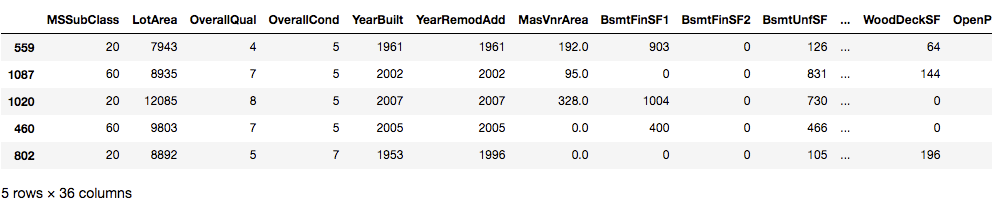

In [4]:
splitted_data["train"].head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
355,60,12474,10,5,2007,2008,272.0,1280,0,402,...,196,134,0,0,0,0,0,8,2008,426000
1316,20,8400,6,9,1962,2005,237.0,0,0,1319,...,0,36,0,0,0,0,0,7,2008,174000
133,30,6120,5,7,1931,1993,0.0,209,0,506,...,48,0,0,0,0,0,0,11,2009,105000
181,20,10125,6,6,1977,1977,0.0,641,279,276,...,238,83,0,0,0,0,0,2,2008,171500
1133,20,9037,8,5,2006,2006,32.0,428,0,1048,...,120,33,0,0,0,0,0,12,2007,265900


### Ожидаемые результаты:

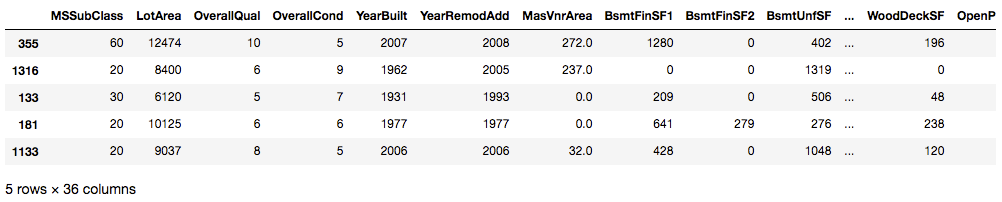

3. Пожалуйста, визуализируйте коэффициенты корреляции для набора данных ```train```.

Примечание: ```figsize=(10,8)```

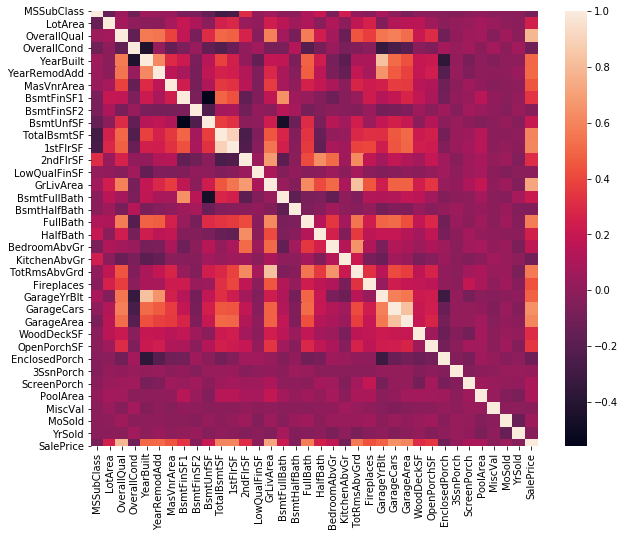

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

#Начало вашего кода 
fig = plt.figure(figsize=(10,8))
sns.heatmap(splitted_data["train"].corr());
#Конец вашего кода

### Ожидаемые результаты:

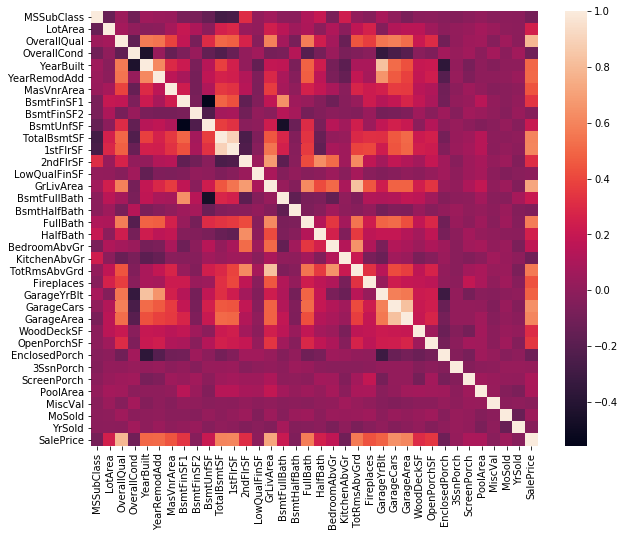

4. Теперь выберите топ 9 наиболее коррелированных параметров с ```"SalePrice"``` и назначьте результаты списку ```important```. Теперь визуализируйте коэффициенты корреляции этих параметров (переменных).

    Примечание: ```figsize=(8,8)```

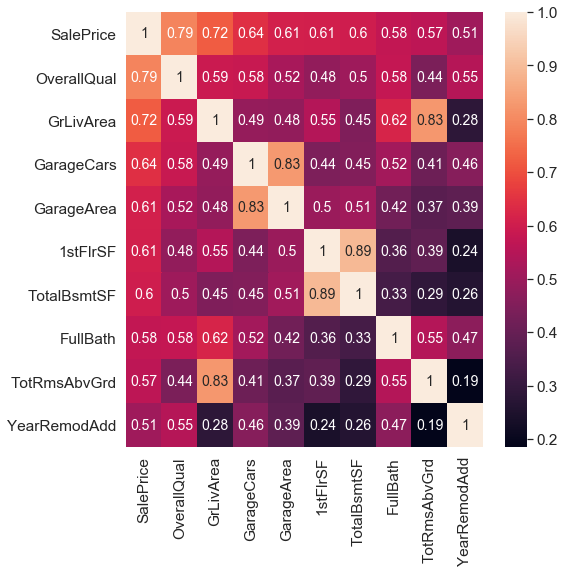

In [7]:
#Начало вашего кода 
corr = splitted_data["train"].corr()
important = abs(corr["SalePrice"]).sort_values(ascending=False).iloc[1:10].index.tolist()
sale_price = abs(corr["SalePrice"]).sort_values(ascending=False).iloc[:10].index.tolist()
#Конец вашего кода
fig = plt.figure(figsize=(8,8))
sns.set(font_scale=1.4)
sns.heatmap(splitted_data["train"][sale_price].corr(), annot=True, annot_kws={"size": 14});
plt.ylim(10, 0);
#Конец вашего кода

### Ожидаемые результаты:


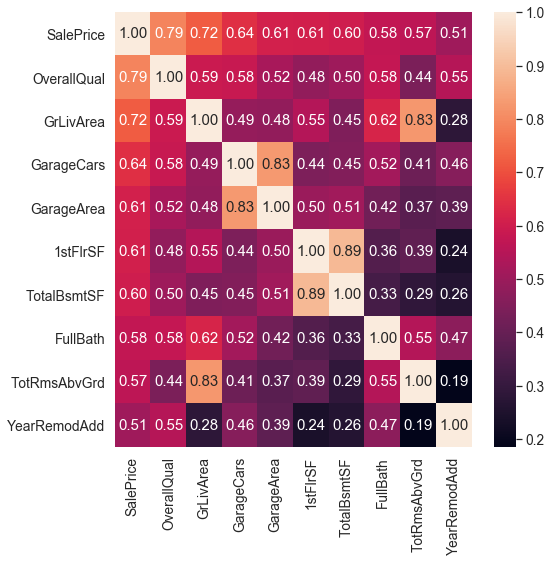

5. Теперь пришло время использовать модель множественной линейной **полиномиальной** регрессии для параметров в списке ```important``` для прогнозирования ```SalePrice```. Пожалуйста, реализуйте функцию ```train_multiple_lin_poly_regressor(data, parameters, target="SalePrice", degree=1, interaction_only=False)```, которая будет обучать модель множественной линейной **полиномиальной** регрессии в степени ```degree``` для ```n``` параметров из списка ```parameters```. Функция должна возвращать словарь с обученной моделью множественной линейной **полиномиальной** регрессии, спискок ```parameters```, степень ```degree```, и обьект класса ```PolynomialFeatures```.

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#Начало вашего кода 
def train_multiple_lin_poly_regressor(data, parameters, target="SalePrice", degree=1, interaction_only=False):
    
    feature = PolynomialFeatures(degree, interaction_only = interaction_only)
    regressor = LinearRegression().fit(feature.fit_transform(data[parameters].values),data[target].values)
   
    dict1 = { 
              "degree"     : degree,
              "feature"    : feature,
              "parameters" : data[parameters].columns,
              "regressor"  : regressor
            }
    
    return dict1
#Конец вашего кода

model = train_multiple_lin_poly_regressor(splitted_data["train"], important, target="SalePrice")
print(model)

{'degree': 1, 'feature': PolynomialFeatures(degree=1, include_bias=True, interaction_only=False,
                   order='C'), 'parameters': Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', '1stFlrSF',
       'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearRemodAdd'],
      dtype='object'), 'regressor': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)}


### Ожидаемые результаты:

```python
{'degree': 1, 'feature': PolynomialFeatures(degree=1), 'parameters': Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', '1stFlrSF',
       'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearRemodAdd'],
      dtype='object'), 'regressor': LinearRegression()}
```

6. Спрогнозируйте ```"SalePrice"``` для набора данных ```validation``` с использованием обученной модели множественной полиномиальной линейной регрессии. Пожалуйста, реализуйте функцию ```validation(model, data, target="SalePrice")```, которая будет принимать словарь ```model```, данные ```validation``` и параметр ```target```, который должен быть предсказан. Функция должна возвращать ```DataFrame``` с первым столбцом, который будет истинным ```"SalePrice"```,  а второй столбец предсказан моделью множественной полиномиальной линейной регрессии и ```rmse```.

In [19]:
#Начало вашего кода
def validation(model, data, target="SalePrice", degree=1, interaction_only=False):
    feature = PolynomialFeatures(degree, interaction_only = interaction_only).fit_transform(data[model['parameters'].tolist()].values)
    predict_data = pd.DataFrame([])
    predict_data[target] = data[target]
    names = "-".join(model['parameters'].tolist())
    predict_data[names] = model['regressor'].predict(feature)
    rmse = np.mean((predict_data[names] - predict_data[target])**2)**0.5
    return predict_data, rmse
    
        
#Конец вашего кода
pd_predictions, rmse = validation(model, splitted_data["validation"], target="SalePrice")
print(rmse)
pd_predictions


52009.70311619261


,SalePrice,OverallQual-GrLivArea-GarageCars-GarageArea-1stFlrSF-TotalBsmtSF-FullBath-TotRmsAbvGrd-YearRemodAdd
559,118500,85080.582133
1087,195000,207746.470302
1020,318000,287960.450175
460,226700,216973.641885
802,116000,106274.907296
...,...,...
120,150750,164239.878495
759,189000,217133.373648
248,139000,175730.008780
991,187500,167715.428459


### Ожидаемые результаты:

```python
52009.724743652005
```


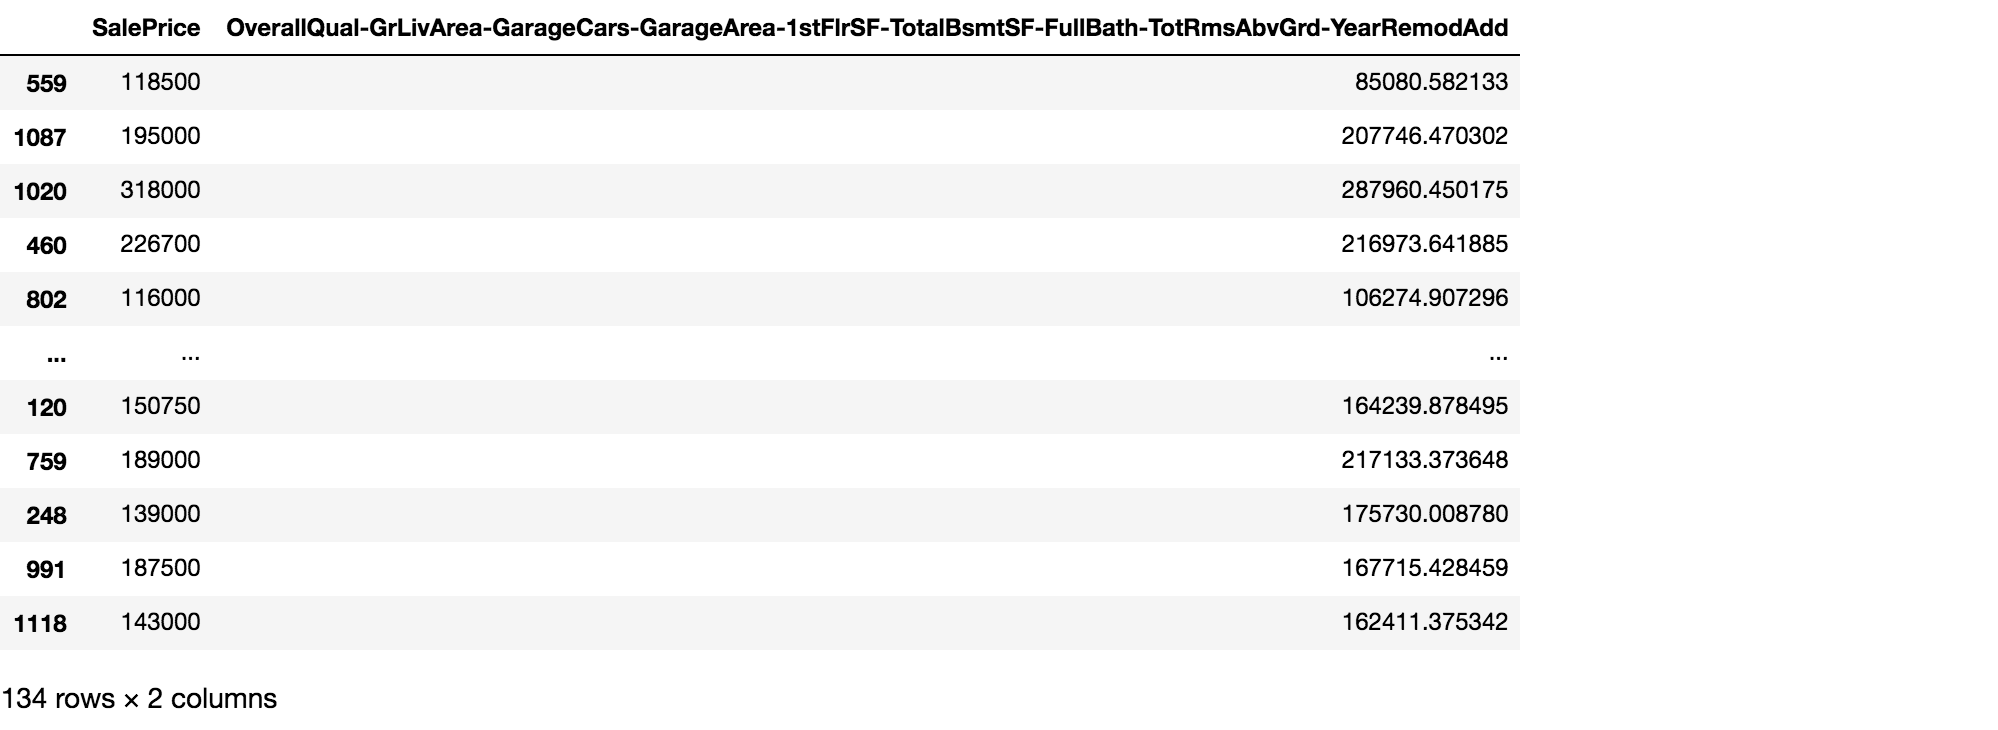

7. В задаче 5 вы обучили модель множественной линейной полиномиальной регрессии степени 1 (то же самое что и множественная линейная регрессия) для 9 самых коррелированных столбцов с «SalePrice». Теперь давайте попробуем степени по выше, такие как степени 2, и 3.

In [20]:
#Начало вашего кода
model2 = train_multiple_lin_poly_regressor(splitted_data["train"], important, target="SalePrice", degree=2)
pd_predictions2, rmse2 = validation(model2, splitted_data["validation"], target="SalePrice", degree=2)
#Конец вашего кода
print(rmse2)
pd_predictions2

53359.6255373355


,SalePrice,OverallQual-GrLivArea-GarageCars-GarageArea-1stFlrSF-TotalBsmtSF-FullBath-TotRmsAbvGrd-YearRemodAdd
559,118500,112572.783120
1087,195000,195189.252659
1020,318000,294680.739807
460,226700,211479.491964
802,116000,104702.624104
...,...,...
120,150750,163662.939836
759,189000,211720.537853
248,139000,170631.497004
991,187500,158831.929121


### Ожидаемые результаты:
```python
53359.599709697075
```

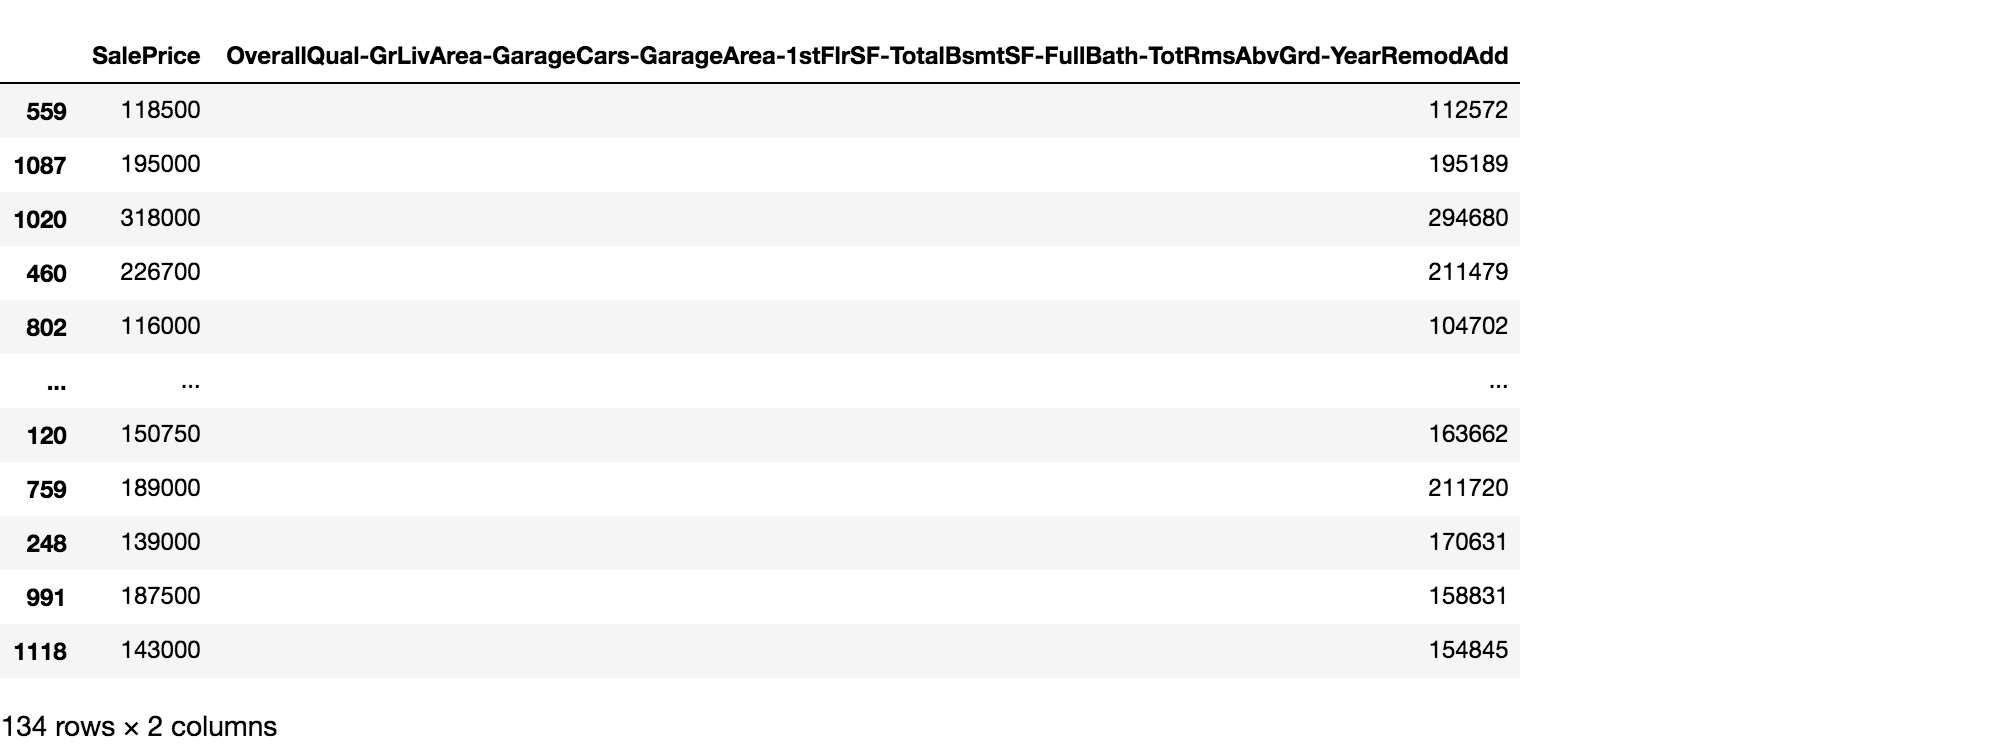


In [21]:
#Начало вашего кода
model3 = train_multiple_lin_poly_regressor(splitted_data["train"], important, target="SalePrice", degree=3)
pd_predictions3, rmse3 = validation(model3, splitted_data["validation"], target="SalePrice", degree=3)
#Конец вашего кода
print(rmse3)
pd_predictions3

51320.42117043793


,SalePrice,OverallQual-GrLivArea-GarageCars-GarageArea-1stFlrSF-TotalBsmtSF-FullBath-TotRmsAbvGrd-YearRemodAdd
559,118500,115004.453443
1087,195000,192147.156334
1020,318000,289826.418765
460,226700,220747.073412
802,116000,60232.224623
...,...,...
120,150750,164020.830287
759,189000,208103.399125
248,139000,153575.815503
991,187500,157468.642922


### Ожидаемые результаты:

```python
48234.48209752457
```

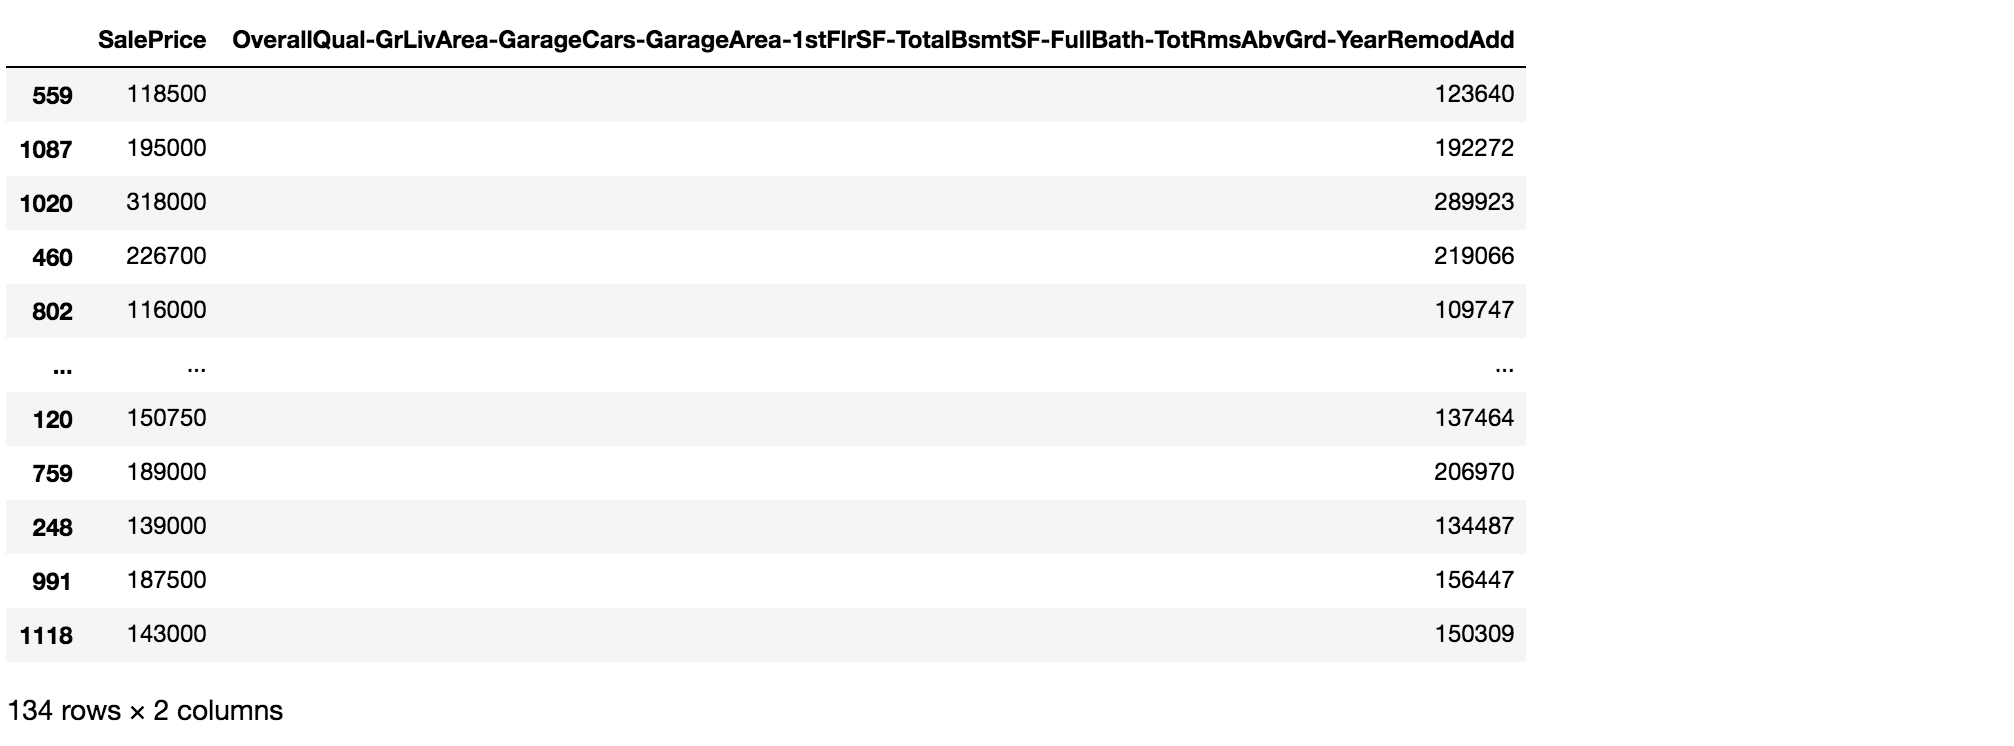


8. Теперь пришло время исследовать, основываясь на полученной вами корреляционной матрице, попытайтесь выбрать некоторые из наиболее коррелированных параметров с ```"SalePrice"``` и в то же время коррелирующие как можно меньше друг с другом. Вы можете выбрать 2-3 параметра для построения модели. После выбора набора параметров, попробуйте различные степени множественной линейной полиномиальной регрессии для построения модели. Кроме того, попробуйте аргумент ```interaction_only```, если он улучшает возможности прогнозирования модели.

**Примечание:** На данный момент просто помните, что чем меньше среднеквадратичная ошибка ```rmse```, тем лучше модель.

In [22]:
#Начало вашего кода 
def train_my_model(data, parameters, target="SalePrice", degree=1, interaction_only=False):
    
    feature = PolynomialFeatures(degree, interaction_only = interaction_only)
    regressor = LinearRegression().fit(feature.fit_transform(data[parameters].values),data[target].values)
   
    dict1 = { 
              "degree"     : degree,
              "feature"    : feature,
              "parameters" : data[parameters].columns,
              "regressor"  : regressor
            }
    
    return dict1
#Конец вашего кода
my_model = train_my_model(splitted_data["train"], ["GrLivArea", "YearRemodAdd"], target="SalePrice")
print(my_model)
#Конец вашего кода

{'degree': 1, 'feature': PolynomialFeatures(degree=1, include_bias=True, interaction_only=False,
                   order='C'), 'parameters': Index(['GrLivArea', 'YearRemodAdd'], dtype='object'), 'regressor': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)}


In [24]:
#Начало вашего кода
def my_validation(model, data, target="SalePrice", degree=1, interaction_only=False):
    feature = PolynomialFeatures(degree, interaction_only = interaction_only).fit_transform(data[model['parameters'].tolist()].values)
    predict_data = pd.DataFrame([])
    predict_data[target] = data[target]
    names = "-".join(model['parameters'].tolist())
    predict_data[names] = model['regressor'].predict(feature)
    rmse = np.mean((predict_data[names] - predict_data[target])**2)**0.5
    return predict_data, rmse
    
        
#Конец вашего кода
my_pd_predictions, my_rmse = my_validation(my_model, splitted_data["validation"], target="SalePrice")
print(my_rmse)
my_pd_predictions

61040.504442506965


,SalePrice,GrLivArea-YearRemodAdd
559,118500,107599.401831
1087,195000,219617.344439
1020,318000,232997.804232
460,226700,233685.445043
802,116000,140769.407302
...,...,...
120,150750,187993.733832
759,189000,196884.476023
248,139000,199169.927950
991,187500,196609.296301


In [26]:
#Начало вашего кода
my_model2 = train_my_model(splitted_data["train"], ["GrLivArea", "YearRemodAdd"], target="SalePrice", degree=2)
my_pd_predictions2, my_rmse2 = my_validation(my_model2, splitted_data["validation"], target="SalePrice", degree=2)
#Конец вашего кода
print(my_rmse2)
my_pd_predictions2

59681.67224039627


,SalePrice,GrLivArea-YearRemodAdd
559,118500,117792.777870
1087,195000,225174.291679
1020,318000,247279.749625
460,226700,246252.525855
802,116000,117860.930806
...,...,...
120,150750,182247.852748
759,189000,194443.461584
248,139000,192342.537189
991,187500,192725.338022


In [27]:
#with interaction_only
#Начало вашего кода
my_model2 = train_my_model(splitted_data["train"], ["GrLivArea", "YearRemodAdd"], target="SalePrice", degree=2, interaction_only=True)
my_pd_predictions2, my_rmse2 = my_validation(my_model2, splitted_data["validation"], target="SalePrice", degree=2, interaction_only=True)
#Конец вашего кода
print(my_rmse2)
my_pd_predictions2

60823.321770766815


,SalePrice,GrLivArea-YearRemodAdd
559,118500,120360.376761
1087,195000,220069.405292
1020,318000,236952.038810
460,226700,237509.711407
802,116000,132417.629010
...,...,...
120,150750,182557.474930
759,189000,193331.778898
248,139000,195032.625313
991,187500,193595.162777


In [28]:
#Начало вашего кода
my_model3 = train_my_model(splitted_data["train"], ["GrLivArea", "YearRemodAdd"], target="SalePrice", degree=3)
my_pd_predictions3, my_rmse3 = my_validation(my_model3, splitted_data["validation"], target="SalePrice", degree=3)
#Конец вашего кода
print(my_rmse3)
my_pd_predictions3

58223.45496934367


,SalePrice,GrLivArea-YearRemodAdd
559,118500,132210.340830
1087,195000,214479.754843
1020,318000,253963.732420
460,226700,245954.136766
802,116000,117297.932787
...,...,...
120,150750,171844.095362
759,189000,181129.515333
248,139000,172982.225065
991,187500,173072.838655


In [29]:
#with interaction_only
#Начало вашего кода
my_model3 = train_my_model(splitted_data["train"], ["GrLivArea", "YearRemodAdd"], target="SalePrice", degree=3, interaction_only=True)
my_pd_predictions3, my_rmse3 = my_validation(my_model3, splitted_data["validation"], target="SalePrice", degree=3, interaction_only=True)
#Конец вашего кода
print(my_rmse3)
my_pd_predictions3

60823.321770766815


,SalePrice,GrLivArea-YearRemodAdd
559,118500,120360.376761
1087,195000,220069.405292
1020,318000,236952.038810
460,226700,237509.711407
802,116000,132417.629010
...,...,...
120,150750,182557.474930
759,189000,193331.778898
248,139000,195032.625313
991,187500,193595.162777


## Вывод: 
При выборе степени, rmse уменьшается, но по прежнему считается высокой. При использовании interaction_only наш rmse наоборот увеличивается то есть ни как не помагает уменьшению ошибки

### Отличная работа